In [70]:
import pandas as pd
import seaborn as sns
import numpy as np

## Exploring COPA Cases "by complainant"

In [128]:
data = pd.read_csv("../data/Complaints/COPA_Cases_-_By_Complainant_or_Subject.csv", \
                   dtype={"LOG_NO":str,"CASE_TYPE":str}) \
        .assign(DATETIME = lambda x: pd.to_datetime(x.COMPLAINT_DATE, format = "%m/%d/%Y %H:%M:%S %p"))
data['LOG_NO'] = data['LOG_NO'].astype(str)

## Exploring Dates

### Observations
* There is a noticeable downward trend in complaints over the decade. 
* The majority of cases are assigned internally.

### Conclusions 
* Assignment may be an important feature. MUST read up on why cases are assigned where!
* Date and time of day aren't a-priori important imo.


[Text(0.5, 1.0, 'Frequency of Complaints')]

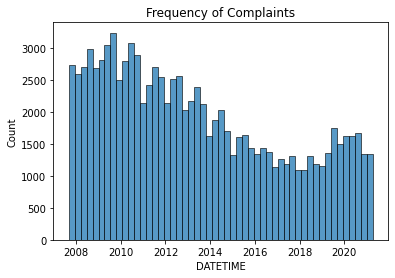

In [20]:
g = sns.histplot(data['DATETIME'])
g.set(title = "Frequency of Complaints")

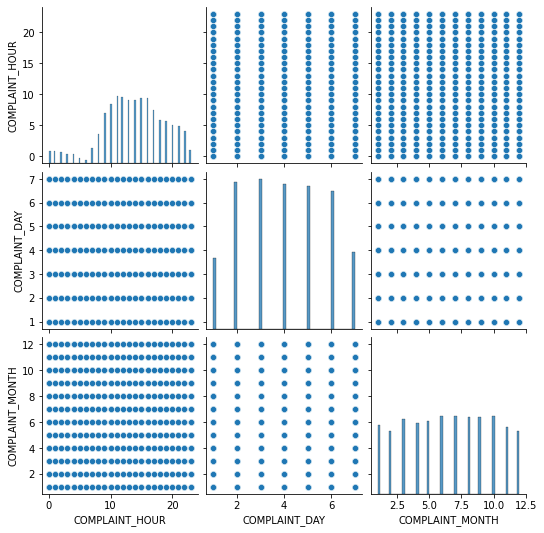

In [25]:
sns.pairplot(data=data, vars = ['COMPLAINT_HOUR','COMPLAINT_DAY','COMPLAINT_MONTH'])

## Exploring Case Info

### Observations
* Huge class imbalance in police shootings
* Loong tail in finding code 

### Conclusions
* Keep shootings, finding code, current category, assignment, case type
* Should break finding code and current cateogry into a bag (how to do this? one hot encode?)
* Maybe don't need to keep current status (or change it to disciplined or not?)

<AxesSubplot:xlabel='POLICE_SHOOTING', ylabel='count'>

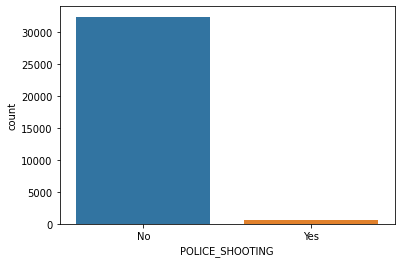

In [81]:
sns.countplot(data=data,x='POLICE_SHOOTING')

In [99]:
data.groupby(by='FINDING_CODE').size().sort_values(ascending=False).head()

FINDING_CODE
No Finding       10168
No Affidavit      9970
Not Sustained     6532
Unfounded         2487
Sustained         1332
dtype: int64

In [100]:
data.groupby(by='CURRENT_CATEGORY').size().sort_values(ascending=False).head()

CURRENT_CATEGORY
Excessive Force                     13820
Taser Discharge                      4763
Verbal Abuse                         1986
Unnecessary Display of Weapon        1781
Fourth Amendment/Improper Search     1239
dtype: int64

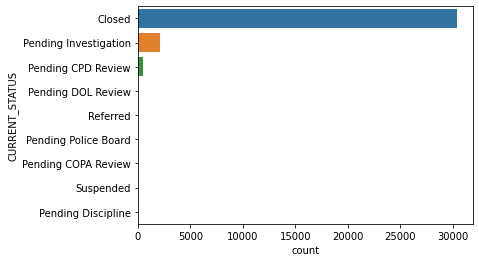

In [56]:
sns.countplot(data = data, y="CURRENT_STATUS", orient='h')

<AxesSubplot:xlabel='ASSIGNMENT', ylabel='count'>

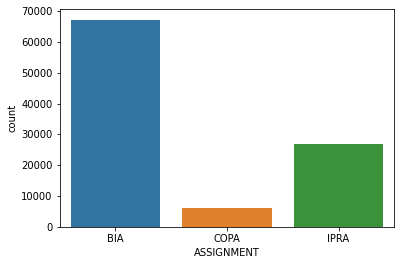

In [47]:
sns.countplot(data = data, x="ASSIGNMENT")

<AxesSubplot:xlabel='CASE_TYPE', ylabel='count'>

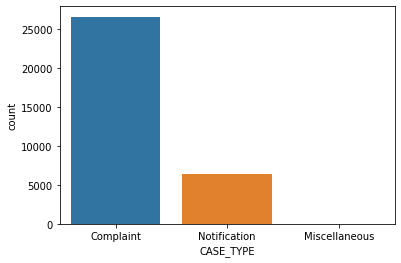

In [43]:
sns.countplot(data=data, x="CASE_TYPE")

## Exploring Complainant Info

### Observations
* Lots of nulls in police beat

### Conclusions
* Keep all the demographic categories (note also class imbalance)
* Keep beat (but may be redundant with complaint-officer dataset)

In [101]:
data.groupby(by='BEAT').size().sort_values(ascending=False).head()

BEAT
Unknown    805
1134       474
3100       404
2515       354
621        351
dtype: int64

RACE_OF_COMPLAINANT
Black or African American                    21392
Hispanic, Latino, or Spanish Origin           4256
White                                         3092
Unknown                                       2462
Asian or Pacific Islander                      177
American Indian or Alaska Native                30
Hispanic, Latino, or Spanish origin             23
Some Other Race, Ethnicity, or Origin           21
Middle Eastern or North African                  9
Prefer Not to Say                                9
Native Hawaiian or Other Pacific Islander        3
dtype: int64

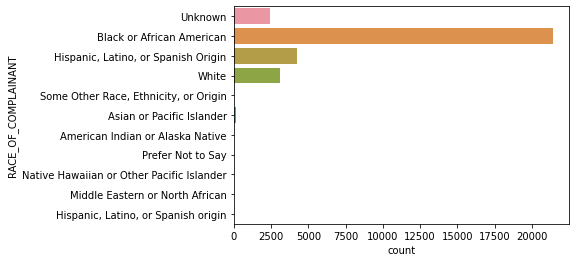

In [96]:
sns.countplot(data=data, y='RACE_OF_COMPLAINANT')
data.groupby(by='RACE_OF_COMPLAINANT').size().sort_values(ascending=False)

SEX_OF_COMPLAINANT
Male                         21489
Female                        8230
Unknown                       1738
Non-Binary / Third Gender       11
Prefer to Self-Describe          4
Prefer Not to Say                1
Prefer not to say                1
dtype: int64

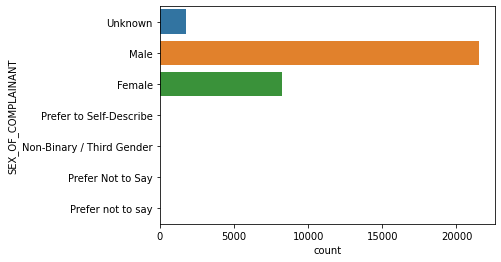

In [97]:
sns.countplot(data=data, y='SEX_OF_COMPLAINANT')
data.groupby(by='SEX_OF_COMPLAINANT').size().sort_values(ascending=False)

AGE_OF_COMPLAINANT
0-19       4997
20-29      9415
30-39      6369
40-49      3759
50-59      1762
60-69       459
70+         157
70-79        12
80-89         6
90+           1
Unknown    4537
dtype: int64

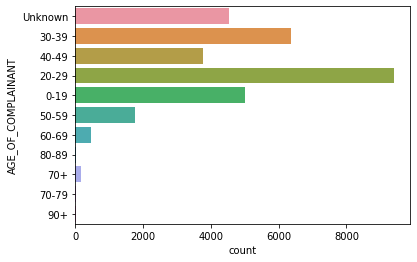

In [98]:
sns.countplot(data=data, y='AGE_OF_COMPLAINANT')
data.groupby(by='AGE_OF_COMPLAINANT').size()

## Exploring COPA Cases "by officer"

### Observations
* ~6000 rows are updates to existing complaints


In [129]:
offdata = pd.read_csv("../data/Complaints/COPA_Cases_-_By_Involved_Officer.csv", \
                      dtype={"LOG_NO":str, "CASE_TYPE":str}) \
            .assign(DATETIME = lambda x: pd.to_datetime(x.COMPLAINT_DATE, format = "%m/%d/%Y %H:%M:%S %p"))
offdata['LOG_NO'] = offdata['LOG_NO'].astype(str)

In [141]:
common = data.merge(offdata, on = 'LOG_NO', how='inner', suffixes= ['.byc', '.byo'])

In [142]:
common.columns

Index(['LOG_NO', 'COMPLAINT_DATE.byc', 'ASSIGNMENT.byc', 'CASE_TYPE.byc',
       'CURRENT_STATUS.byc', 'CURRENT_CATEGORY.byc', 'FINDING_CODE.byc',
       'POLICE_SHOOTING.byc', 'BEAT.byc', 'RACE_OF_COMPLAINANT',
       'SEX_OF_COMPLAINANT', 'AGE_OF_COMPLAINANT', 'COMPLAINT_HOUR.byc',
       'COMPLAINT_DAY.byc', 'COMPLAINT_MONTH.byc', 'DATETIME.byc',
       'COMPLAINT_DATE.byo', 'ASSIGNMENT.byo', 'CASE_TYPE.byo',
       'CURRENT_STATUS.byo', 'CURRENT_CATEGORY.byo', 'FINDING_CODE.byo',
       'POLICE_SHOOTING.byo', 'BEAT.byo', 'RACE_OF_INVOLVED_OFFICER',
       'SEX_OF_INVOLVED_OFFICER', 'AGE_OF_INVOLVED_OFFICER',
       'YEARS_ON_FORCE_OF_INVOLVED_OFFICER', 'COMPLAINT_HOUR.byo',
       'COMPLAINT_DAY.byo', 'COMPLAINT_MONTH.byo', 'DATETIME.byo'],
      dtype='object')

In [149]:
commonall = data.merge(offdata, how='inner', suffixes= ['.byc', '.byo'])

In [144]:
common.shape

(119516, 32)

In [150]:
commonall.shape

(114056, 20)

In [145]:
data.shape

(100216, 16)

In [146]:
offdata.shape

(108365, 17)

In [147]:
data['LOG_NO'].unique().shape

(94747,)

In [148]:
offdata['LOG_NO'].unique().shape

(94747,)

In [151]:
100216 - 94747

5469

In [152]:
119516 - 114056

5460